<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/8_1_xor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
model.predict(x), y) 
 [[0.04654948]
 [0.9333854 ]
 [0.49949554]
 [0.5071459 ]] [[0]
 [1]
 [1]
 [0]]


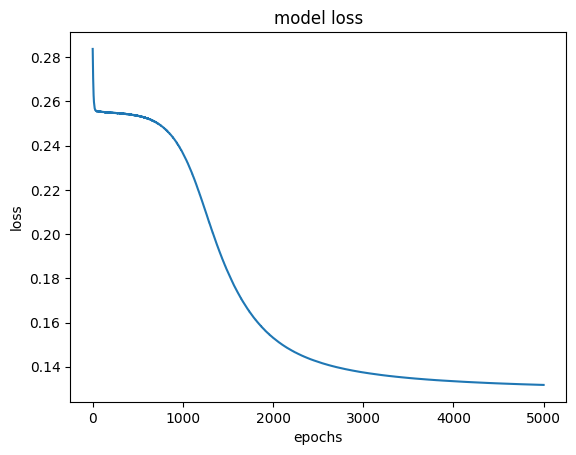

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([[0],[1],[1],[0]])

"""
아래 모델에서 input_shape=(2,)로 1차원이다. x 데이터는 (4, 2)로 2차원인데 왜일까?
모델에 들어오는 각 샘플 하나하나가 2개의 값을 가진다는 뜻입니다.
예: [0, 1], [1, 0], [1, 1] 이런 식의 각 입력은 길이가 2인 1차원 벡터죠.
즉, x 배열은 4개의 샘플이 있고, 각 샘플이 (2,) 형태이기 때문에 input_shape=(2,)가 맞습니다.
그러나 input_shape=(4,2)는 전체 데이터 한 덩어리를 하나의 입력으로 보겠다는 의미
"""

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2,activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='mse')
hist = model.fit(x,y,epochs=5000,batch_size=1, verbose = 0)

print("model.predict(x), y) \n", model.predict(x), y)

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()